In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
plt.style.use('dashboard.mplstyle')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

### Get car accident deaths

[Get from CDC by searching for "motor accident"](https://data.cdc.gov/browse?q=motor%20accident&sortBy=relevance)

In [2]:
df_car = pd.read_json('https://data.cdc.gov/resource/bxq8-mugm.json') \
           .pivot(index='month', columns='year', values='motor_vehicle_accidents')
df_car_20 = pd.read_json('https://data.cdc.gov/resource/9dzk-mvmi.json') \
              .pivot(index='month', columns='year', values='motor_vehicle_accidents')
df_car[2020] = df_car_20[2020]
df_car.index = months
df_car

year,2014,2015,2016,2017,2018,2019,2020
Jan,2572,2754,2734,3034,3010,2948,2905.0
Feb,2248,2350,2820,2748,2734,2535,2907.0
Mar,2589,2764,3105,3164,3015,2956,2869.0
Apr,2720,2830,3152,3238,2979,3079,2565.0
May,3038,3339,3481,3416,3443,3417,3357.0
Jun,3084,3222,3542,3492,3514,3449,4015.0
Jul,3227,3530,3582,3730,3552,3527,4079.0
Aug,3277,3642,3600,3409,3490,3645,4196.0
Sep,3069,3372,3612,3572,3579,3543,4049.0
Oct,3304,3550,3834,3629,3657,3506,NaN


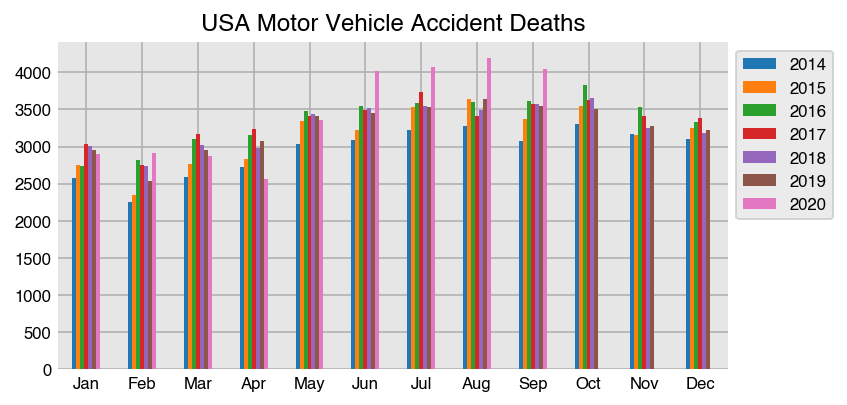

In [3]:
ax = df_car.plot(kind='bar', rot=0)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('USA Motor Vehicle Accident Deaths');

## Get miles traveled from US Department of Transportation

[Office of Highway Policy Information](https://www.fhwa.dot.gov/policyinformation/travel_monitoring/tvt.cfm) - they provide travel each month measured in millions of miles in excel workbooks.

In [4]:
dfs = []
for month in months:
    mon = month.lower()
    url =f'https://www.fhwa.dot.gov/policyinformation/travel_monitoring/20{mon}tvt/20{mon}tvt.xls'
    dft = pd.read_excel(url, sheet_name=1, header=23)
    dfs.append(dft.loc[:, 'Year':])

df_drive_month = pd.concat((df.iloc[:, :2].set_index('Year') for df in dfs[-12:]), axis=1).dropna().astype('int')
df_drive_month.columns = months
df_drive_month.index = df_drive_month.index.astype('int')
df_miles = df_drive_month.T

df_rate = (df_car / df_miles).dropna(axis=1, how='all') * 100
df_rate

,2014,2015,2016,2017,2018,2019,2020
Jan,1.135977,1.179453,1.140692,1.250618,1.229897,1.186819,1.145252
Feb,1.050718,1.081852,1.264512,1.217848,1.200392,1.117814,1.254835
Mar,1.021608,1.071247,1.171049,1.179088,1.113759,1.088493,1.298484
Apr,1.059454,1.076795,1.168910,1.186672,1.082773,1.093527,1.512676
May,1.141089,1.232836,1.252284,1.214517,1.213550,1.194192,1.574600
Jun,1.170581,1.190802,1.278742,1.245853,1.243242,1.226516,1.640952
Jul,1.194951,1.268087,1.256137,1.292599,1.220665,1.193259,1.554384
Aug,1.218981,1.337943,1.289338,1.206478,1.224609,1.272114,1.669950
Sep,1.239059,1.321886,1.378421,1.346847,1.338274,1.304055,1.630840
Oct,1.246115,1.322313,1.391096,1.301239,1.299657,1.234351,NaN


Text(0.99, 0.03, 'Created by Ted Petrou')

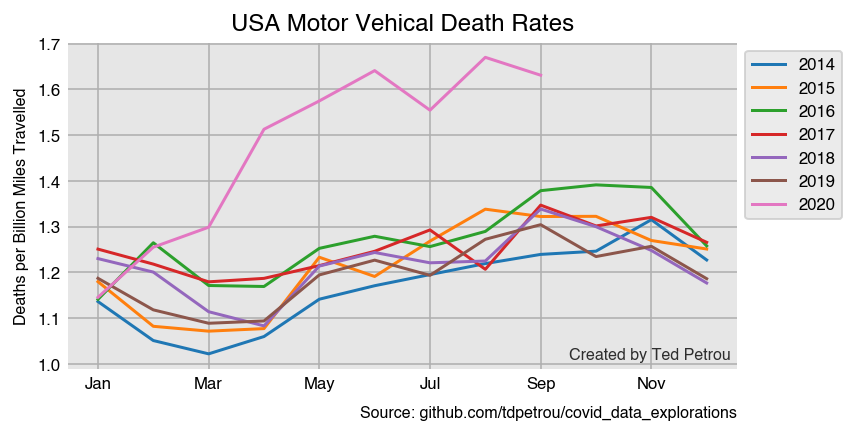

In [18]:
ax = df_rate.plot(rot=0)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('USA Motor Vehical Death Rates')
ax.set_ylabel('Deaths per Billion Miles Travelled', size=8)
ax.text(1, -.15, 'Source: github.com/tdpetrou/covid_data_explorations', 
        ha='right', transform=ax.transAxes, size=8)
ax.text(.99, .03, "Created by Ted Petrou", ha='right', transform=ax.transAxes, size=8, alpha=.8)